In [310]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [311]:
resumeDataSet = pd.read_csv('UpdatedResumeDataSet.csv',encoding='utf-8')

In [312]:
resumeDataSet.drop_duplicates(subset="Resume", keep='first', inplace=True)

In [313]:
resumeDataSet['cleaned_resume'] = ''

In [314]:
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [316]:
print ("Displaying the distinct categories of resume:\n\n ")
print (resumeDataSet['Category'].unique())

Displaying the distinct categories of resume:

 
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


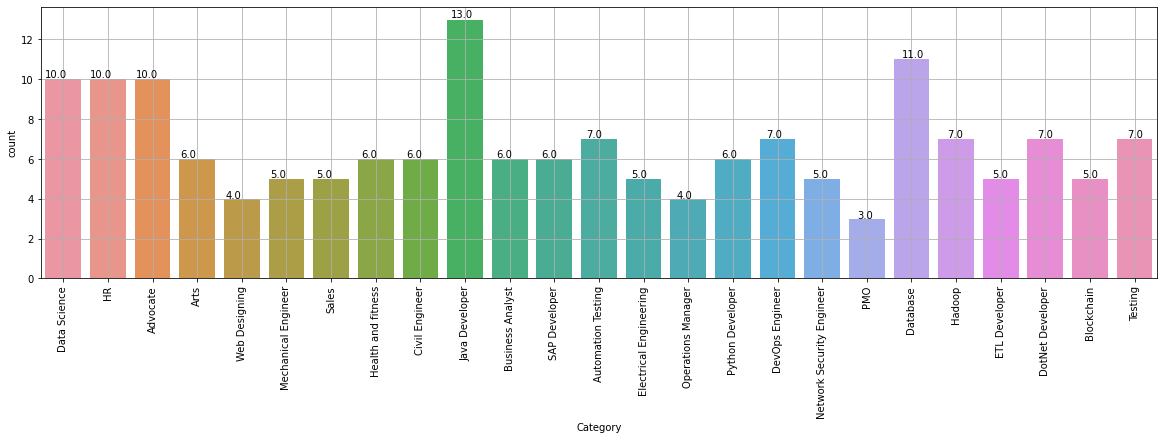

In [318]:
import seaborn as sns
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=resumeDataSet)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

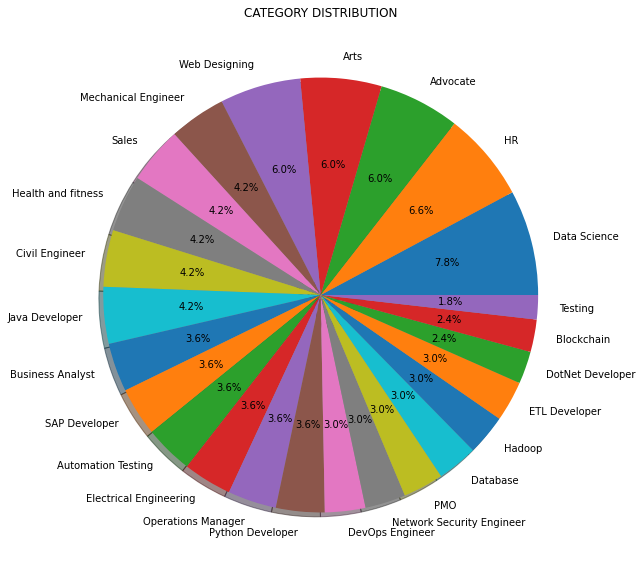

In [319]:
from matplotlib.gridspec import GridSpec
targetCounts = resumeDataSet['Category'].value_counts()
targetLabels  = resumeDataSet['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(22,22))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)
plt.show()

In [320]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))

In [321]:
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [322]:
resumeDataSet_d=resumeDataSet.copy()

In [323]:
import nltk

In [324]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Meher
[nltk_data]     Bhardwaj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [325]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Meher
[nltk_data]     Bhardwaj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [326]:

from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resumeDataSet['Resume'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = cleanResume(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('Exprience', 616), ('company', 520), ('months', 515), ('Details', 510), ('description', 458), ('1', 348), ('Project', 299), ('data', 242), ('project', 231), ('6', 227), ('Maharashtra', 217), ('year', 215), ('SQL', 215), ('team', 207), ('Less', 199), ('using', 197), ('January', 189), ('Skill', 175), ('Management', 167), ('Ltd', 159), ('Pune', 158), ('C', 151), ('Education', 144), ('management', 143), ('Data', 140), ('Developer', 137), ('Engineering', 134), ('database', 133), ('Java', 130), ('Database', 127), ('monthsCompany', 125), ('System', 123), ('University', 123), ('Server', 123), ('Pvt', 122), ('India', 120), ('like', 118), ('The', 117), ('Responsibilities', 117), ('various', 116), ('A', 113), ('business', 113), ('2', 113), ('development', 112), ('reports', 111), ('application', 110), ('issues', 106), ('system', 106), ('Mumbai', 106), ('Test', 105)]


In [328]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])

In [329]:
resumeDataSet.head(7)

,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
5,6,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",SKILLS C Basics IOT Python MATLAB Data Science...
6,6,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,Skills Python Tableau Data Visualization R Stu...


In [330]:
resumeDataSet.Category.value_counts()

15    13
7     11
6     10
0     10
12    10
9      7
13     7
8      7
2      7
23     7
5      6
4      6
21     6
14     6
20     6
1      6
11     5
22     5
17     5
16     5
10     5
3      5
18     4
24     4
19     3
Name: Category, dtype: int64

In [331]:
resumeDataSet_d.Category.value_counts() #understanding decode LabelEncoder

Java Developer               13
Database                     11
Data Science                 10
Advocate                     10
HR                           10
DotNet Developer              7
Hadoop                        7
DevOps Engineer               7
Automation Testing            7
Testing                       7
Civil Engineer                6
Business Analyst              6
SAP Developer                 6
Health and fitness            6
Python Developer              6
Arts                          6
Electrical Engineering        5
Sales                         5
Network Security Engineer     5
Mechanical Engineer           5
ETL Developer                 5
Blockchain                    5
Operations Manager            4
Web Designing                 4
PMO                           3
Name: Category, dtype: int64

In [332]:
del resumeDataSet_d #clearing the space occupied 

In [360]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Featuring completed")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.2,
                                                 shuffle=True, stratify=requiredTarget)

Featuring completed


In [334]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 0.89
Accuracy of KNeighbors Classifier on test set:     0.82


In [336]:
import PyPDF2

In [337]:
pdf = open('Radhika Singh_Java.pdf','rb')

In [338]:
pdfReader = PyPDF2.PdfFileReader(pdf)

In [339]:
print(pdfReader.numPages)

3


In [340]:
page = pdfReader.getPage(0)

In [341]:
text = page.extractText()

In [342]:
text

' \nRadhika Singh\n \n \nBlk 241\n,\nKim Keat Link\n \n \n#08\n-\n191\n \nSingapore 310241\n \nradhikasingh.sg@gmail.com\n \n                                                                                        \nNationality: Singaporean\n \n+65\n-\n91 999 098\n \n \nI \nam\n \none who can work very well both, as an individual \nand\n \nin a team. Hard work and enthusiasm are the two pillars that \ndefine the work that I do. With that, I have been able to work in situations even when minimal direction has been offere\nd. \nCreating solutions to meet changing busines\ns demands is something I have been doing and \nam \nvery comfortable with. I \nenjoy working with figures and h\nave a high attention to detail.\n \nI \nhave experience with both US GAA\nP and IFRS reporting \nstandards.\n \nBeing\n \np\nrof\nicient in Microsoft Dynamics \n(\nGreat Plains & Solomon) and SQL naturally makes me a fit for a Finance \nposition.\n \n \n \nProfessional Experience\n \n \nThe Unity Group of Comp

In [343]:
text = re.sub('http\S+\s*', ' ', text)  # remove URLs
text = re.sub('RT|cc', ' ', text)  # remove RT and cc
text = re.sub('#\S+', '', text)  # remove hashtags
text = re.sub('@\S+', '  ', text)  # remove mentions
text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)  # remove punctuations
text = re.sub(r'[^\x00-\x7f]',r' ', text) 
text = re.sub('\s+', ' ', text)  # remove extra whitespace

In [344]:
print(text)

 Radhika Singh Blk 241 Kim Keat Link 191 Singapore 310241 radhikasingh sg Nationality Singaporean 65 91 999 098 I am one who can work very well both as an individual and in a team Hard work and enthusiasm are the two pillars that define the work that I do With that I have been able to work in situations even when minimal direction has been offere d Creating solutions to meet changing busines s demands is something I have been doing and am very comfortable with I enjoy working with figures and h ave a high attention to detail I have experience with both US GAA P and IFRS reporting standards Being p rof icient in Microsoft Dynamics Great Plains Solomon and SQL naturally makes me a fit for a Finance position Professional Experience The Unity Group of Companies Pte Ltd Associate September 2016 till date An Associate Java developer in the oracle team that focus es o n the Marketing Vertical of Venture Capital I am the lead with 3 colleagues in my team The Team manages the entire d evelopmen

In [345]:
import re

In [346]:
match = re.search("skills (.+?) review", text,flags=re.IGNORECASE) 
 
try: 
    result = match.group(1) 
except: 
    result = "no match found" 
 
print(result)

requirements gathering and des Consistently met deadlines and requirements for all production work ord to identify and alleviate the number of bugs in the software and provided maintenance and development of bug fixes and patch sets for existing applications Education Details Bachelor of Engineering Computer Savitribai Phule Pune University Java Developer Java Developer Aurus Tech Pvt Ltd Skill Details JAVA Exprience 32 months LINUX Exprience 6 months Adavance Java Exprience Less than 1 year months Derby Exprience Less than 1 year months Oracle Exprience Less than 1 year monthsCompany Details company Aurus Tech Pvt Ltd description Having 2 years of experience in working with a Payment Gateway Solutions provider with Core Java Hardworking Java Developer enthusiastic about working with multicultural teams company Aurus Tech Pvt Ltd description rtners to finalize designs and confirm requirements Collaborated with other developers to identify and alleviate the number of bugs in the softwar

In [347]:
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [348]:
new_entry = {'Category': 6,'Resume':result, 'cleaned_resume': result}

In [349]:
resumeDataSet = resumeDataSet.append(new_entry, ignore_index=True)

In [351]:
resumeDataSet.Category.value_counts()

15    13
6     11
7     11
0     10
12    10
9      7
13     7
8      7
2      7
23     7
5      6
4      6
21     6
14     6
20     6
1      6
11     5
22     5
17     5
16     5
10     5
3      5
18     4
24     4
19     3
Name: Category, dtype: int64

In [352]:
len(resumeDataSet['cleaned_resume'])

167

In [355]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Featuring completed")

X_train1,X_test1,y_train1,y_test1 = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.0059,
                                                 shuffle=False)

Featuring completed


In [356]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train1, y_train1)
prediction = clf.predict(X_test1)

In [357]:
print(prediction)

[15]


In [358]:
if prediction == 15:
    ans = 'Java Developer'
elif prediction == 7:
    ans = 'Database Engineer'
elif prediction == 6:
    ans = 'Data Science Professional'
elif prediction == 0:
    ans = 'Advocate'
elif prediction == 12:
    ans = 'HR'
elif prediction == 9:
    ans = 'DotNet Developer'
elif prediction == 13:
    ans = 'Hadoop Developer'
elif prediction == 8:
    ans = 'DevOps Engineer'
elif prediction == 2:
    ans = 'Automation Testingr'
elif prediction == 23:
    ans = 'Testing'
elif prediction == 5:
    ans = 'Civil Engineer'
elif prediction == 4:
    ans = 'Business Analyst'
elif prediction == 21:
    ans = 'SAP Developer'
elif prediction == 14:
    ans = 'Health and fitness'
elif prediction == 20:
    ans = 'Python Developer '
elif prediction == 1:
    ans = 'Arts'
elif prediction == 11:
    ans = 'Electrical Engineering'
elif prediction == 22:
    ans = 'Sales'
elif prediction == 17:
    ans = 'Network Security Engineer'
elif prediction == 16:
    ans = 'Mechanical Engineer'
elif prediction == 10:
    ans = 'ETL Developer'
elif prediction == 3:
    ans = 'Blockchain Developer'
elif prediction == 18:
    ans = 'Operations Manager'
elif prediction == 24:
    ans = 'Web Designing'
elif prediction == 19:
    ans = 'PMO '
else:
    ans = 'No Suitable'

In [359]:
print("The uploaded resume is suitable for " + ans + " role")

The uploaded resume is suitable for Java Developer role
